# Creating a OCULIST DocVQA dataset for Donut


## Set-up environment

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.4 MB/s eta 0:00:00


## Load example dataset

Load example, to see the extructure that needs our dataset: https://huggingface.co/datasets/nielsr/docvqa_1200_examples_donut/viewer/nielsr--docvqa_1200_examples_donut/train 



from datasets import load_dataset

dataset_example = load_dataset("nielsr/docvqa_1200_examples_donut")

dataset_example




```
    DatasetDict({
        test: Dataset({
            features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer', 'ground_truth'],
            num_rows: 200
        })
        train: Dataset({
            features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer', 'ground_truth'],
            num_rows: 1000
        })
    })
```

dataset.features expected result:
```
{'id': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None),
 'query': {'de': Value(dtype='string', id=None),
  'en': Value(dtype='string', id=None),
  'es': Value(dtype='string', id=None),
  'fr': Value(dtype='string', id=None),
  'it': Value(dtype='string', id=None)},
 'answers': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bounding_boxes': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=4, id=None), length=-1, id=None),
 'answer': {'match_score': Value(dtype='float64', id=None),
  'matched_text': Value(dtype='string', id=None),
  'start': Value(dtype='int64', id=None),
  'text': Value(dtype='string', id=None)},
 'ground_truth': Value(dtype='string', id=None)}
```

## Load custom data

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

!cp "/content/drive/MyDrive/Datasets/bupa_docvqa_dataset_v2_forHF.zip" "/content/bupa_docvqa_dataset_v2_forHF.zip"
!unzip "/content/bupa_docvqa_dataset_v2_forHF.zip"

Mounted at /content/drive/
Archive:  /content/bupa_docvqa_dataset_v2_forHF.zip
   creating: bupa_docvqa_dataset_v2_forHF/
  inflating: bupa_docvqa_dataset_v2_forHF/AFP_redacted_00.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/CA 19-9_redacted_00.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_03.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_04.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_05.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_06.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_07.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_10.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_11.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678A_12.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678B_00.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678B_03.jpg  
  inflating: bupa_docvqa_dataset_v2_forHF/Caris_12345678B_04.jpg  
  inflati

# Create custom dataset

In [ ]:
LABELS_FILE = "bupa_docvqa_dataset_v2_forHF/metadata_gt.csv"

In [ ]:
import pandas as pd
from datasets.dataset_dict import *
from datasets import *
import datasets
from PIL import Image

def preprocess(example):
    # image = Image.open(example["image_path"]).convert("RGB")
    image = Image.open("bupa_docvqa_dataset_v2_forHF/"+example["file_name"]).convert("RGB")
    new_image = {'image': image}
    return new_image

feature = datasets.Image(decode=True)

df = pd.read_csv(LABELS_FILE, sep=";", engine="python")
display(df)

# # dataset = load_dataset("csv", data_files="oculist/metadata.csv")
# dataset = Dataset.from_pandas(df)
# # display(dataset)

dataset = Dataset.from_pandas(df).map(preprocess)
display(dataset)

,file_name,ground_truth
0,AFP_redacted_00.jpg,"{""gt_parses"": [{""question"" : ""What is the repo..."
1,AFP_redacted_00.jpg,"{""gt_parses"": [{""question"" : ""What is the page..."
2,AFP_redacted_00.jpg,"{""gt_parses"": [{""question"" : ""Which is the res..."
3,AFP_redacted_00.jpg,"{""gt_parses"": [{""question"" : ""Which is the val..."
4,AFP_redacted_00.jpg,"{""gt_parses"": [{""question"" : ""Which is the rep..."
...,...,...
272,Guardant_34567891B_09.jpg,"{""gt_parses"": [{""question"" : ""What is Title of..."
273,Outside Pathology Report 18DEC2011_ran_13.jpg,"{""gt_parses"": [{""question"" : ""What is level of..."
274,Outside Pathology Report 18DEC2011_ran_13.jpg,"{""gt_parses"": [{""question"" : ""What is level of..."
275,Outside Pathology Report 18DEC2011_ran_13.jpg,"{""gt_parses"": [{""question"" : ""What is level of..."


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Dataset({
    features: ['file_name', 'ground_truth', 'image'],
    num_rows: 277
})

For example GT defeiniton have to be like: 
`{gt_parses: [{"question" : "what is the model name?", "answer" : "donut"}, {"question" : "what is the model name?", "answer" : "document understanding transformer"}]}`

The Donut authors also note: "in case your dataset has multiple answers, gt_parses should be a list of dictionaries, each containing a question-answer pair." In case your dataset only has single answers to each question, then you can create just a gt_parse rather than gt_parses.

It's important to verify that this JSON can be properly read. Example:



```
{'gt_parses': [{'answer': '1995-2000',
   'question': 'Between which years estimated growth rates have been taken? ?'}]}
   ```



In [ ]:
import json

example = dataset[0]
json.loads(example['ground_truth'])

{'gt_parses': [{'question': 'What is the report date?', 'answer': '9/3/2020'},
  {'question': 'What is the report date?', 'answer': '9/3/2020 6:01 PM'}]}

Show an example

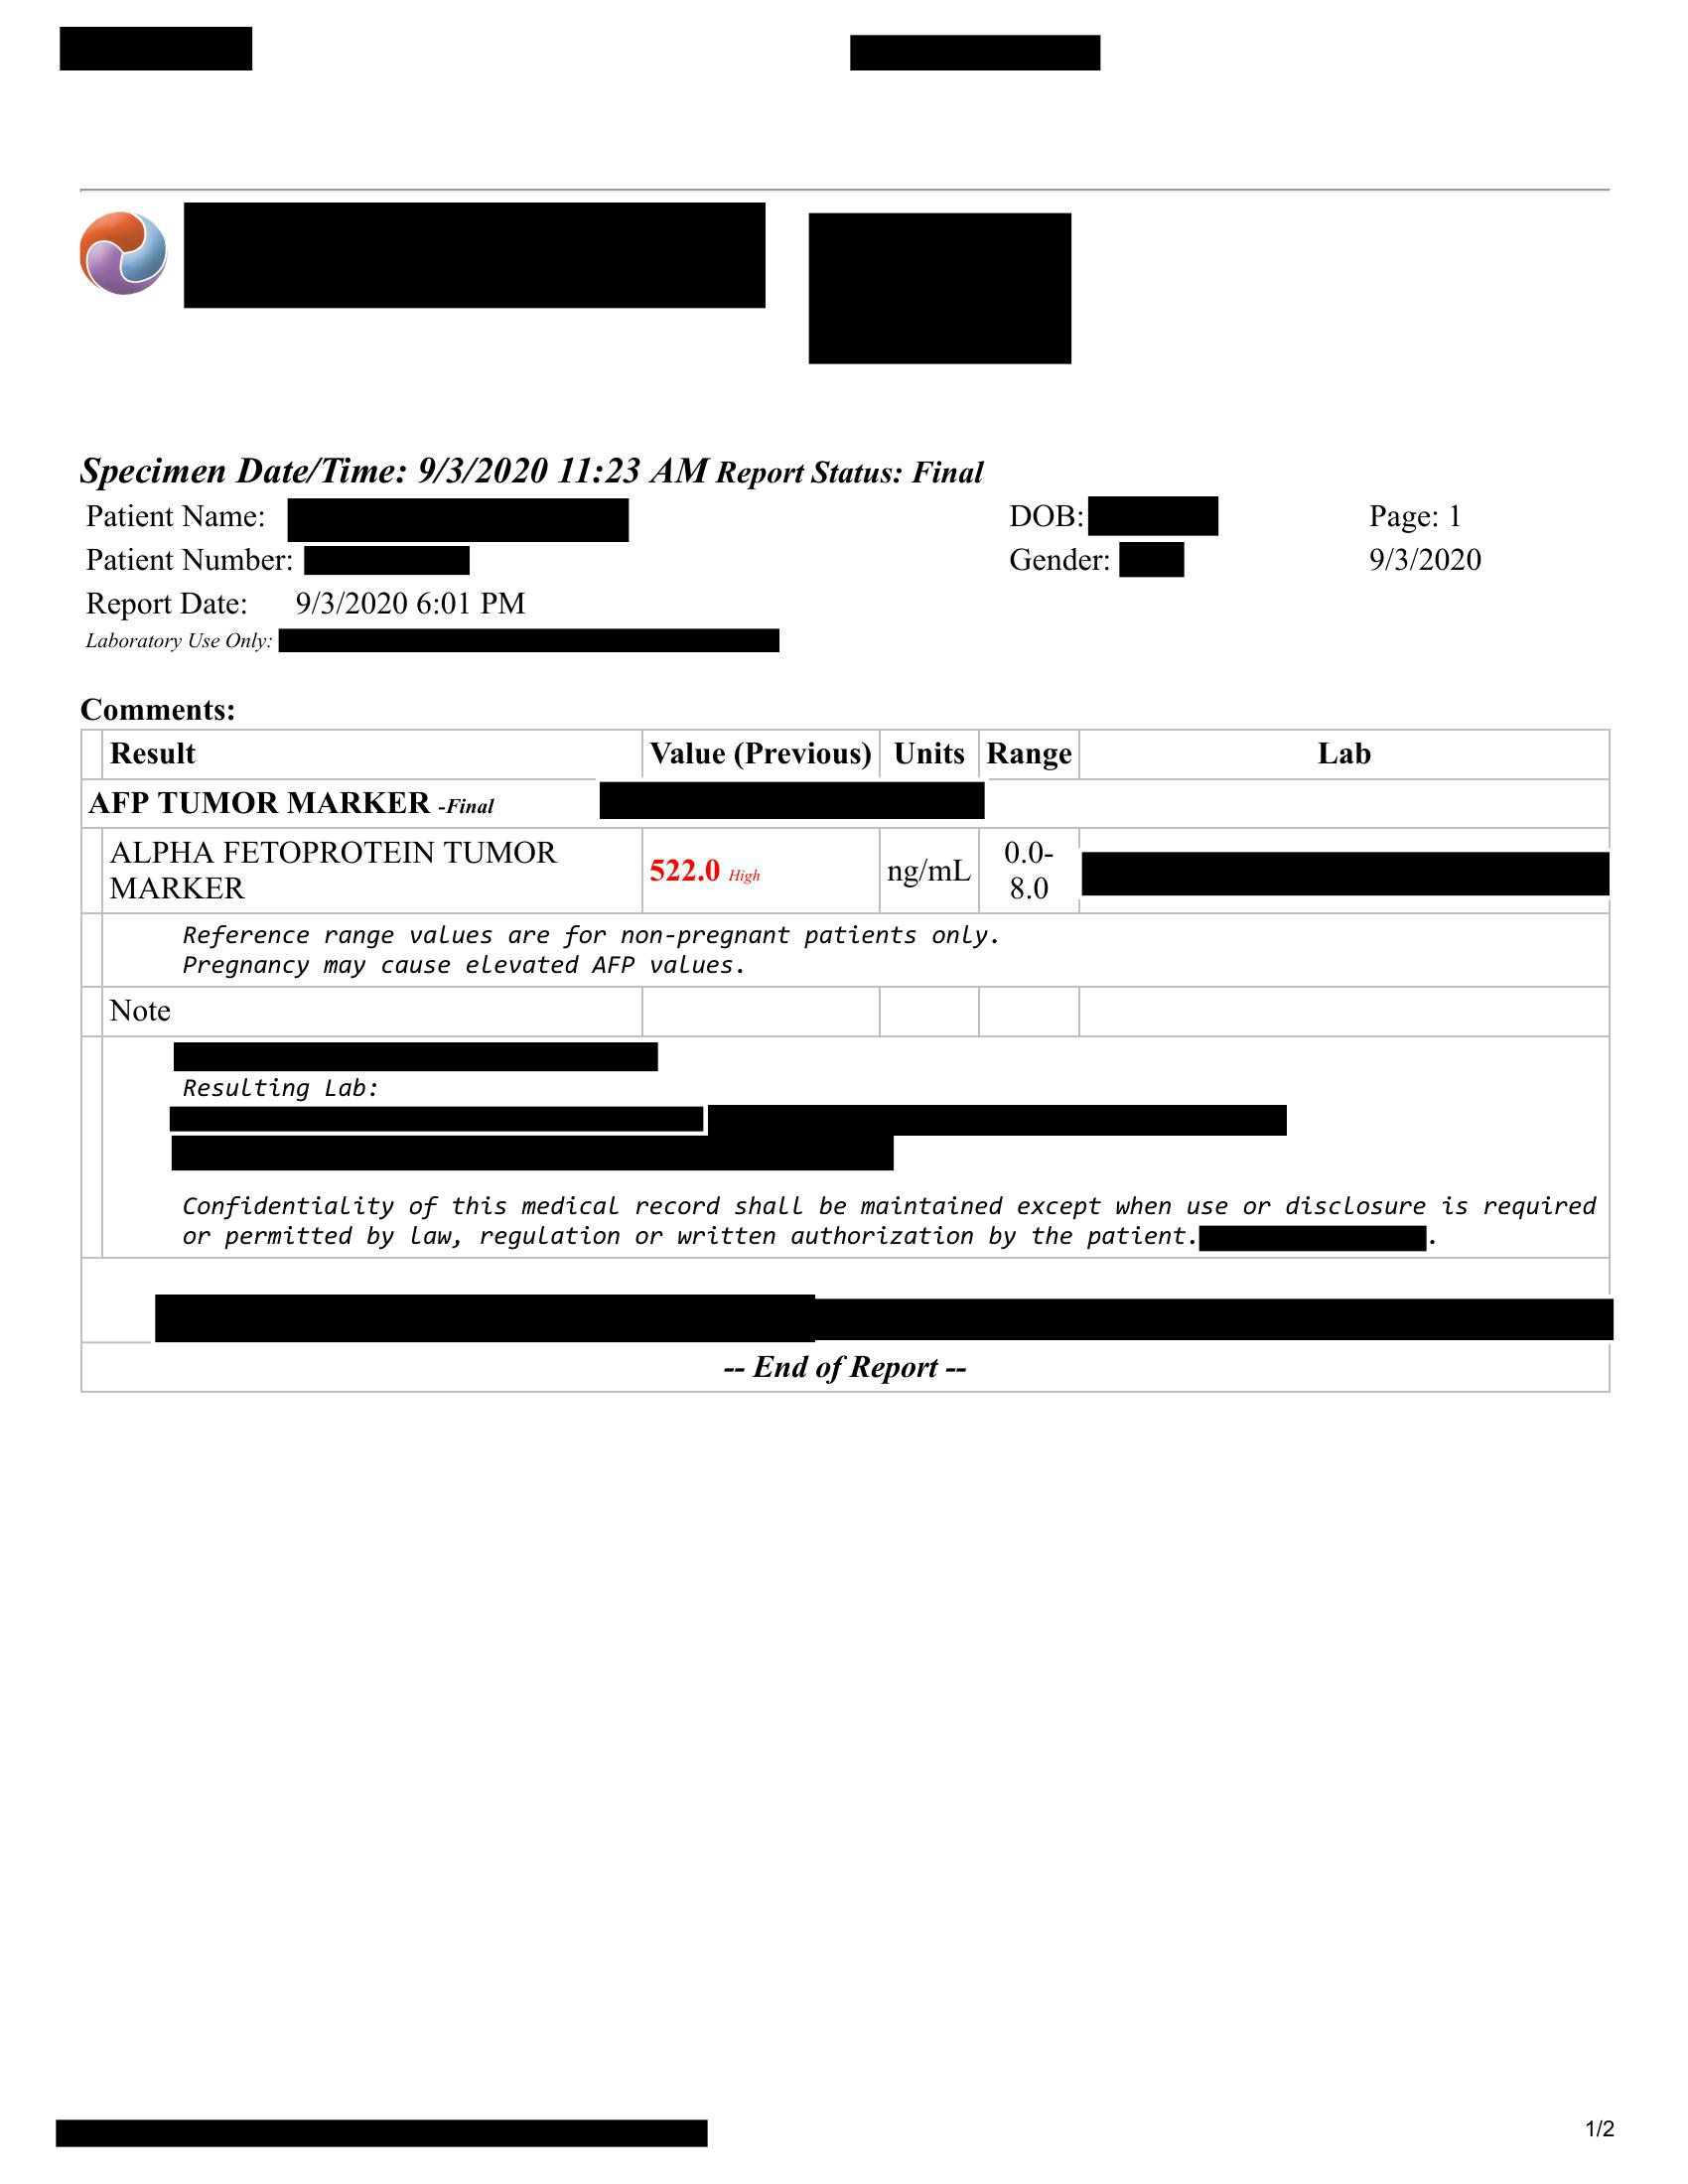


RESULT:  {"gt_parses": [{"question" : "What is the report date?", "answer" : "9/3/2020"}, {"question" : "What is the report date?", "answer" : "9/3/2020 6:01 PM"}]}

DATASET FEATURES:


{'file_name': Value(dtype='string', id=None),
 'ground_truth': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}


DATASET ELEMENT:


In [ ]:
test_image = dataset[0]["image"]
display(test_image)

print("\nRESULT: ", dataset[0]["ground_truth"])
display
print("\nDATASET FEATURES:")
display(dataset.features)
print("\nDATASET ELEMENT:")
# display(dataset[0])

Split data in validation and train

In [ ]:
# SPLIT TRAIN AND TEST/VAL
train_dataset, validation_dataset= dataset.train_test_split(test_size=0.1).values()
# dataset = DatasetDict({'train': train_dataset, 'val': validation_dataset})
dataset = DatasetDict({'train': train_dataset, 'test': validation_dataset})
dataset

# ## ALL IMAGES TO TEST
# dataset = DatasetDict({'test': dataset})
# dataset

DatasetDict({
    train: Dataset({
        features: ['file_name', 'ground_truth', 'image'],
        num_rows: 249
    })
    test: Dataset({
        features: ['file_name', 'ground_truth', 'image'],
        num_rows: 28
    })
})

## Push result

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
## note that you can push your dataset to the hub very easily (and reload afterwards using load_dataset)!
dataset.push_to_hub("aymanechilah/donut-docvqa-concert1", private=True)

Map:   0%|          | 0/249 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/28 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]